Fetching stock data...


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           252 non-null    datetime64[ns]
 1   (Adj Close, AAPL)  252 non-null    float64       
 2   (Close, AAPL)      252 non-null    float64       
 3   (High, AAPL)       252 non-null    float64       
 4   (Low, AAPL)        252 non-null    float64       
 5   (Open, AAPL)       252 non-null    float64       
 6   (Volume, AAPL)     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB
None
Calculating SMA...
Calculating Support and Resistance levels...
Preparing data for regression...
Training regression model...
Mean Squared Error: 26.77


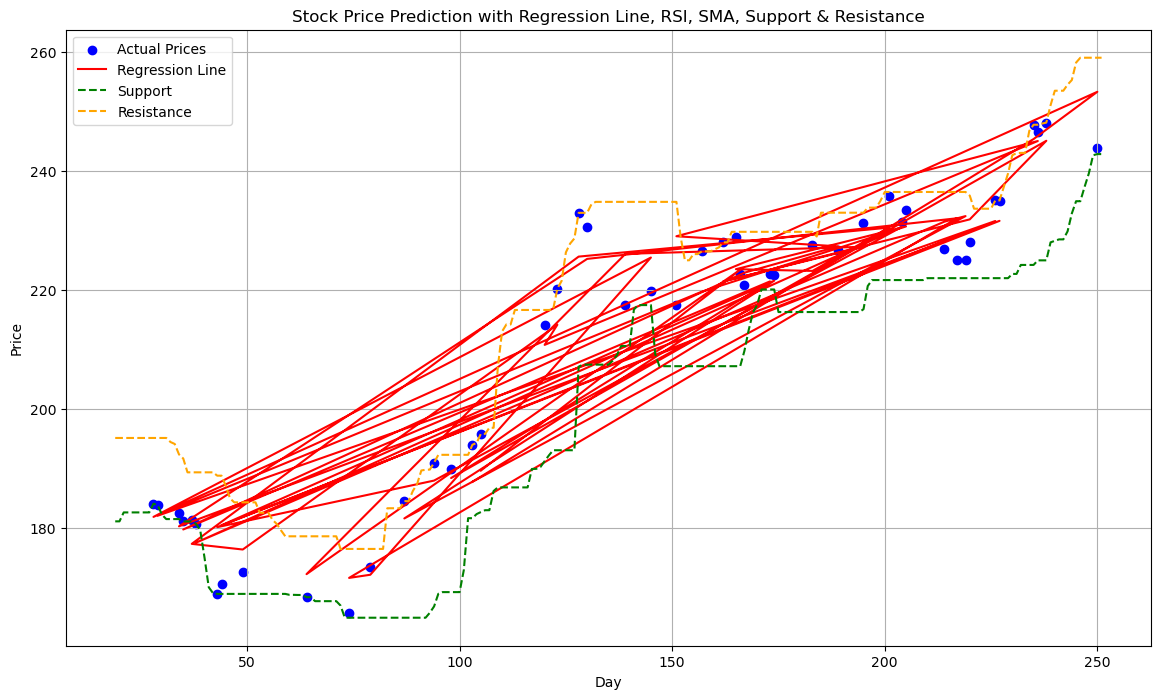

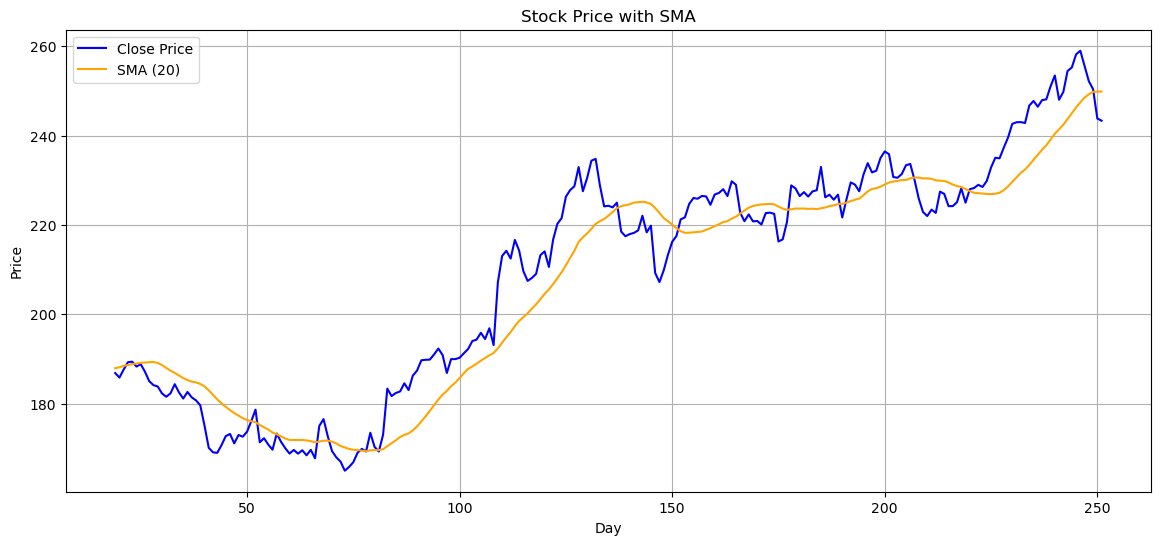

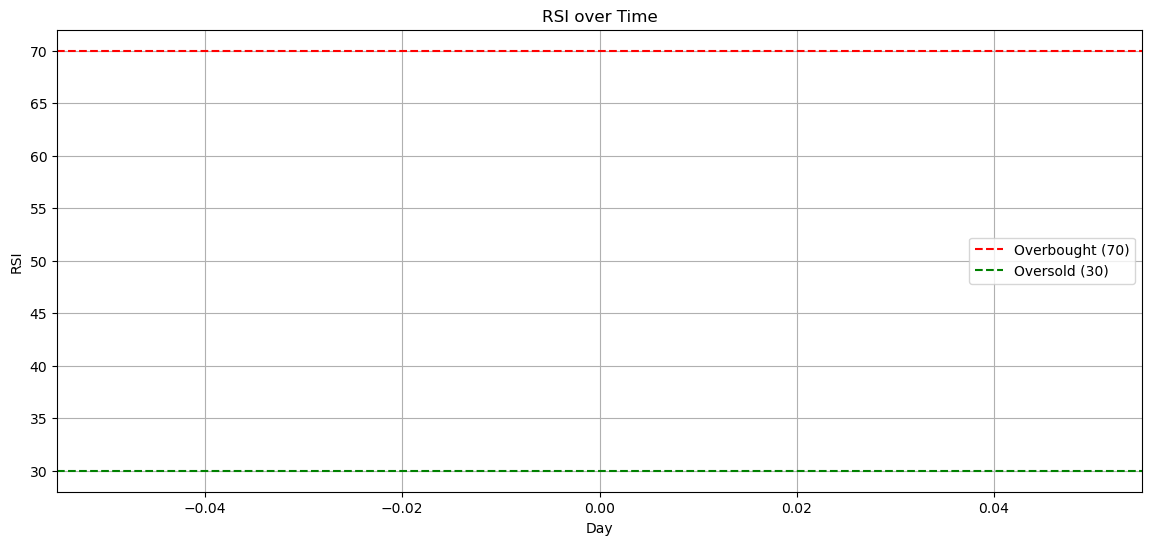

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator

# Step 1: Download stock data
print("Fetching stock data...")
ticker = "AAPL"  # Replace with desired stock ticker
stock_data = yf.download(ticker, period='1y', interval='1d')
stock_data = stock_data.reset_index()

# Step 2: Ensure the data contains 'Close' prices
if 'Close' not in stock_data.columns:
    raise ValueError("The data must contain a 'Close' column for closing prices.")

# Fill missing values in 'Close' column
stock_data['Close'] = stock_data['Close'].fillna(method='ffill').fillna(method='bfill')
# Step 3: Calculate RSI
print(stock_data.info())
stock_data['Close'] = stock_data['Close'].fillna(method='ffill').fillna(method='bfill')
from ta.momentum import RSIIndicator



# Step 4: Calculate SMA

print("Calculating SMA...")

sma = SMAIndicator(close=stock_data['Close'], window=20)
# Calculate SMA using pandas rolling window
stock_data['SMA'] = stock_data['Close'].rolling(window=20).mean()

# Step 5: Calculate Support and Resistance
print("Calculating Support and Resistance levels...")
stock_data['Support'] = stock_data['Close'].rolling(window=20).min()
stock_data['Resistance'] = stock_data['Close'].rolling(window=20).max()

# Step 6: Prepare data for regression
print("Preparing data for regression...")
stock_data['Day'] = np.arange(len(stock_data))  # Numerical index for regression
# Drop rows with NaN values
stock_data = stock_data.dropna()

# Use additional features for regression
X = stock_data[['Day', 'SMA', 'Support', 'Resistance']]
y = stock_data['Close']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Linear Regression model
print("Training regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 11: Plot Scatter Plot with Regression Line
plt.figure(figsize=(14, 8))
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual Prices')  # Actual prices
plt.plot(X_test['Day'], y_pred, color='red', label='Regression Line')  # Regression line
plt.plot(stock_data['Day'], stock_data['Support'], color='green', linestyle='--', label='Support')  # Support
plt.plot(stock_data['Day'], stock_data['Resistance'], color='orange', linestyle='--', label='Resistance')  # Resistance
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Prediction with Regression Line, RSI, SMA, Support & Resistance')
plt.legend()
plt.grid()
plt.show()

# Step 12: Display RSI and SMA
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA (20)', color='orange')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price with SMA')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Day')
plt.ylabel('RSI')
plt.title('RSI over Time')
plt.legend()
plt.grid()
plt.show()
